# **Inicializando o Tabuleiro**

In [1]:
### **Definindo tabuleiro** ------------------------------------------------------------------------------------ >>
def initialize_board():
  ## Tabuleiro vazio:
  tabuleiroList = []
  for i in range(64):
    if i == 27 or i == 36:
      tabuleiroList.append(-1) #colocando peças BRANCAS na posição inicial do meio do tabuleiro
    elif i == 28 or i == 35:
      tabuleiroList.append(1) #colocando peças PRETAS na posição inicial do meio do tabuleiro
    else:
      tabuleiroList.append(0)
      
  tabuleiro = tuple(tabuleiroList)

  return tabuleiro


### **Desenhando as peças no tabuleiro** ------------------------------------------------------------------------------------ >>

def draw_piece(draw, cell, piece) :
    ## Convertendo linear para matricial
    line   = cell // 8
    column = cell  % 8

    ## Gerando as coordenadas
    x0 = column * 50
    x1 = (column+1)*50
    y0 = line*50
    y1 = (line+1)*50

    if piece == 1 :
        draw.ellipse([x0, y0, x1, y1], width=2, fill = "black")
    elif piece == -1 :
        draw.ellipse([x0, y0, x1, y1], width=2, fill = "white")



### **Desenhando jogadas válidas no tabuleiro** ------------------------------------------------------------------------------------ >>

def draw_piece_valid_moves(draw, cell) :
    ## Convertendo linear para matricial
    line   = cell // 8
    column = cell  % 8

    ## Gerando as coordenadas
    x0 = column * 50
    x1 = (column+1)*50
    y0 = line*50
    y1 = (line+1)*50

    draw.ellipse([x0, y0, x1, y1], width=1, outline = "silver")


### **Desenhando número no tabuleiro** ------------------------------------------------------------------------------------ >>

def draw_number(draw, cell) :
    ## Convertendo linear para matricial
    line   = cell // 8
    column = cell  % 8

    ## Gerando as coordenadas
    x = column * 50 + 20
    y = line*50 + 20

    text = str(cell)
    draw.text((x, y), text, fill = "darkgreen", align ="center")



### **Desenhando tabuleiro junto com jogadas válidas** ------------------------------------------------------------------------------------ >>

## Importa biblioteca
from PIL import Image, ImageDraw

def draw_board(tab, turn, valids) :
    turno = turn
    ## Desenhamos um quadrado 400x400
    board = Image.new('RGB', (400, 400),  "green")
    ## Criamos uma espécie de canvas para desenhar
    draw  = ImageDraw.Draw(board)

    ## Desenhamos duas linhas horizontais
    x0 = 0
    y0 = 0
    x1 = 400
    y1 = 0

    for i in range(9):
      draw.line( (x0, y0, x1, y1), fill = "black", width = 1 ) 
      y0 += 50
      y1 = y0

    ## Desenhamos duas linhas verticais
    x0 = 0
    y0 = 0
    x1 = 0
    y1 = 400
    for i in range(9):
      draw.line( (x0, y0, x1, y1), fill = "black", width = 1 ) 
      x0 += 50
      x1 = x0

    for i in range(len(tab)) :
        ## Desenha a peça no tabuleiro
        if (tab[i]) :
            draw_piece(draw, i, tab[i])
        else:
          ## Desenha o número
          draw_number(draw, i)

    validMove = valids

    for i in range(len(validMove)) :
        draw_piece_valid_moves(draw, validMove[i])   

    return board


# **Funções auxiliares**

In [2]:

### **Definindo Jogadas Válidas** ------------------------------------------------------------------------------------ >>

## Função que devolve as jogadas válidas
def get_valid_moves(tab, turn) :
    valids = []
    for i in range(len(tab)) :
        if tab[i] == turn:  
            ##Verificação da linha sentido direita 
            if i <= 61 and (i+1)%8!=0:
              if tab[i+1] == -(turn):
                for y in range(2,8):
                  if (i+y)%8==0:
                    break
                  elif tab[i+y] == 0:
                    valids.append(i+y)
                    break
                  elif tab[i+y] == turn:
                    break
            ##Verificação da linha sentido esquerda
            if i >= 2 and (i-1)%8!=7:
              if tab[i-1] == -(turn):
                for y in range(2,8):
                  if (i-y)%8==7:
                    break
                  elif tab[i-y] == 0:
                    valids.append(i-y)
                    break  
                  elif tab[i-y] == turn:
                    break   
            ##Verificação da coluna sentido baixo 
            if i <= 47:
              if tab[i+8] == -(turn):
                for y in range(16,57,8):
                  if (i+y) > 63:
                    break
                  if tab[i+y] == 0:
                    valids.append(i+y)
                    break
                  elif tab[i+y] == turn:
                    break
            ##Verificação da coluna sentido cima
            if i > 15:
              if tab[i-8] == -(turn):
                for y in range(16,57,8):
                  if (i-y) < 0:
                    break
                  if tab[i-y] == 0:
                    valids.append(i-y)
                    break
                  elif tab[i-y] == turn:
                    break
            ##Verificação da diagonal inferior direita 
            if i <= 45:
              if tab[i+9] == -(turn):
                for y in range(18,64,9):
                  if (i+y) > 63:
                    break
                  elif (i+y) % 8 == 0:
                    break
                  elif tab[i+y] == 0:
                    valids.append(i+y)
                    break
                  elif tab[i+y] == turn:
                    break
            ##Verificação da diagonal inferior esquerda
            if i <= 47:
              if tab[i+7] == -(turn):
                for y in range(14,50,7):
                  if (i+y) > 63:
                    break
                  elif (i+y) % 8 == 7:
                    break
                  elif tab[i+y] == 0:
                    valids.append(i+y)
                    break
                  elif tab[i+y] == turn:
                    break  
              ##Verificação da diagonal superior direita
              if i >= 16:
                if tab[i-7] == -(turn):
                  for y in range(14,50,7):
                    if (i-y) < 0:
                      break
                    elif (i-y) % 8 == 0:
                      break
                    if tab[i-y] == 0:
                      valids.append(i-y)
                      break
                    elif tab[i-y] == turn:
                      break
            ##Verificação da diagonal superior esquerda
            if i >= 18:
              if tab[i-9] == -(turn):
                for y in range(18,64,9):
                  if (i-y) < 0:
                    break
                  elif (i-y) % 8 == 7:
                    break
                  elif tab[i-y] == 0:
                    valids.append(i-y)
                    break
                  elif tab[i-y] == turn:
                    break 
    return sorted(set(valids))  



### **Definindo ganhador** ------------------------------------------------------------------------------------ >>

## Código que devolve o jogador vencedor, 
## ou zero em caso de não ter um vencedor
## definido
def winner(tab) :
    somas0 = tab.count(0)
    somas1 = tab.count(1)
    somas2 = tab.count(-1)
    if (somas2 > somas1) and (somas0 == 0) : #Pecas BRANCAS ganham quando forem maioria, e quando não houverem espacos vazios
        return -1
    elif (somas2 < somas1) and (somas0 == 0): #Pecas PRETAS ganham quando forem maioria, e quando não houverem espacos vazios
        return 1
    else:
        return 0    


### **Jogador bobinho que faz jogadas ao acaso** ------------------------------------------------------------- >>

import random
def player(tab, turn, valids) :
    valids = get_valid_moves(tab, turn)
    if valids :
        return (turn, random.choice(valids) )



### **Jogador humano** ------------------------------------------------------------------------------------ >>

def human_player(tab, turn, valids) : 
    print("\n")     
    ## Desenha tabuleiro antes do jogador humano 
    board = draw_board( tab, turn, valids)
    display(board)  
    print("Jogadas válidas: %s" % (valids))
    move = int(input())

    while not move in valids : 
        print("Jogadas válidos: %s" % (valids))
        move = int(input())
    return turn, move



# **Função que vira as peças** ------------------------------------------------------------------------------------ >>

def flip_pieces( tab, piece, pos ) : 
  for i in range(len(tab)):
    if i == pos:            
      contador = 1
      ##linha sentido direita
      if i <= 61 and (i+1)%8!=7:
        if tab[i+1] == -(piece):
          for y in range(1,8):
            if (y+i)%8 == 7:
              break
            elif tab[y+i] == -(piece):
              contador = contador + 1
            elif tab[i+y] == piece:
              for z in range(1,contador):
                tab[i+z] = piece
              break
            
      contador = 1
      ##linha sentido esquerda
      if i >= 2 and (i-1)%8!=7:
        if tab[i-1] == -(piece):
          for y in range(1,8):
            if (i-y)%8 == 0:
              break
            if tab[i-y] == -(piece):
              contador = contador + 1
            elif tab[i-y] == piece:
              for z in range(1,contador):
                tab[i-z] = piece
              break 

      contador = 1
      ##coluna sentido baixo
      if i <= 47:
        if tab[i+8] == -(piece):
          for y in range(8,49,8):
            if (i+y) > 63:
              break
            if tab[y+i] == -(piece):
              contador = contador + 8
            elif tab[i+y] == piece:
              for z in range(8,contador,8):   
                tab[i+z] = piece
              break

      contador = 1
      ##coluna sentido cima
      if i > 15:
        if tab[i-8] == -(piece):
          for y in range(8,49,8):
            if (i-y) < 0:
              break
            if tab[i-y] == -(piece):
              contador = contador + 8
            elif tab[i-y] == piece:
              for z in range(8,contador,8):
                tab[i-z] = piece
              break   

      contador = 1
      ##diagonal inferior direita
      if i <= 45:
        if tab[i+9] == -(piece):
          for y in range(9,46,9):
            if (i+y) > 63:
                break
            if tab[i+y] == -(piece):
              contador = contador + 9
            elif tab[i+y] == piece:
              for z in range(9,contador,9):
                tab[i+z] = piece
              break

      contador = 1
      ##diagonal inferior esquerda
      if i <= 47:
        if tab[i+7] == -(piece):
          for y in range(7,43,7):
            if (i+y) > 63:
              break
            if tab[i+y] == -(piece):
              contador = contador + 7
            elif tab[i+y] == piece:
              for z in range(7,contador,7):
                tab[i+z] = piece
              break

      contador = 1
      ##diagonal superior direita
      if i >= 16:
        if tab[i-7] == -(piece):
          for y in range(7,43,7):
            if (i-y) < 0:
              break
            if tab[i-y] == -(piece):
              contador = contador + 7
            elif tab[i-y] == piece:
              for z in range(7,contador,7):
                tab[i-z] = piece
              break

      contador = 1
      ##diagonal superior esquerda
      if i >= 18:
        if tab[i-9] == -(piece):
          for y in range(9,46,9):
            if (i-y) < 0:
              break
            elif tab[i-y] == -(piece):
              contador = contador + 9
            elif tab[i-y] == piece:
              for z in range(9,contador,9):
                tab[i-z] = piece
              break
  return tab



# **Função que gerencia o jogo** ------------------------------------------------------------------------------------ >>

## Abaixo uma função que gerencia um jogo. 
def game(player1, player2) :
    ## Inicialização
    playgame = False
    turn   = 1
    result = 0 
    tabuleiro = initialize_board()
    
    ## Lista que guardará o histórico
    history = [] 

    ## Enquanto houverem jogadas, pedimos para o jogador vez prosseguir
    while get_valid_moves(tabuleiro, turn) :
        ## Verifica jogadas válidas
        validMoves  = get_valid_moves(tabuleiro, turn)
    
        ## para ver os passo a passo das jogadas com mais detalhes, 
        ## mostre o tabuleiro aqui
        ## board = draw_board( tabuleiro, turn, validMoves)
        ## display(board)
    
        ## Pedindo uma jogada ao jogador da vez.
        piece, pos = None, None
        if turn == 1 :
            piece, pos = player1(tabuleiro, turn, validMoves)    
        else : 
            piece, pos = player2(tabuleiro, turn, validMoves)
            print("\n")
            print("O bobinho jogou na posição %s\n" % (pos))
        
        # Colocando a peça no tabuleiro
        ltab = list(tabuleiro)

        ## EU queria deixar assim >> 
        ltab = flip_pieces( ltab, piece, pos )
        
        ##Flippando as peças

        ltab[pos] = piece
       
        tabuleiro = tuple(ltab)

        ## Adicionando tabuleiro no histórico
        history.append(tabuleiro)

        ## Verificando se alguém ganhou
        result = winner(tabuleiro)

        ## Trocando a vez de jogar
        turn = -turn
    
    return result, history


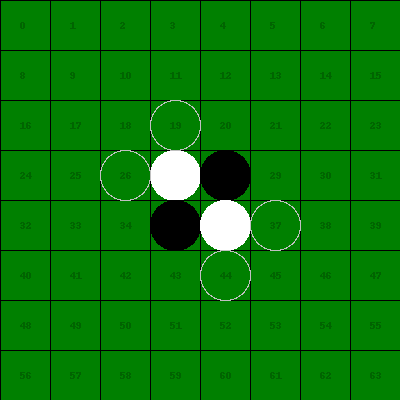

Jogadas válidas: [19, 26, 37, 44]
19


O bobinho jogou na posição 20





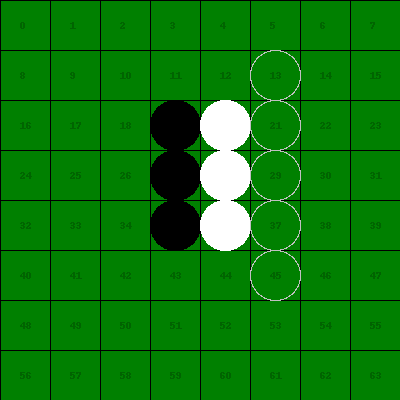

Jogadas válidas: [13, 21, 29, 37, 45]
13


O bobinho jogou na posição 10





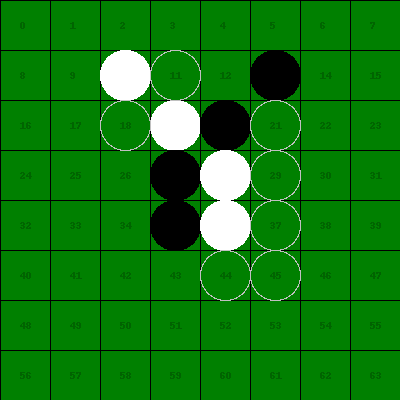

Jogadas válidas: [11, 18, 21, 29, 37, 44, 45]
11


O bobinho jogou na posição 26





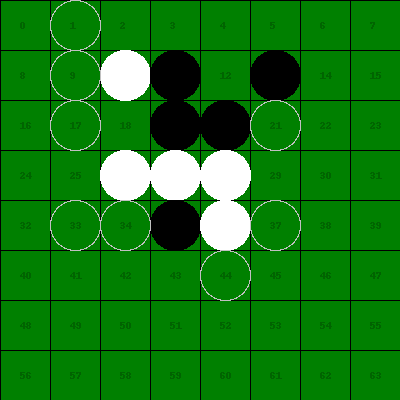

Jogadas válidas: [1, 9, 17, 21, 33, 34, 37, 44]
1


O bobinho jogou na posição 12





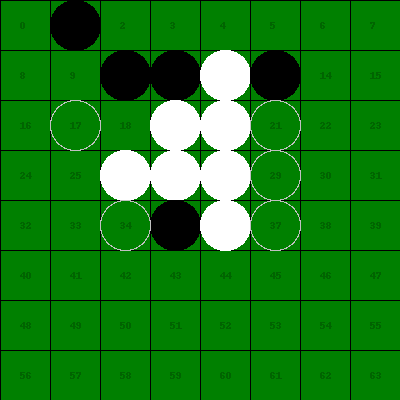

Jogadas válidas: [17, 21, 29, 34, 37]
21


O bobinho jogou na posição 14





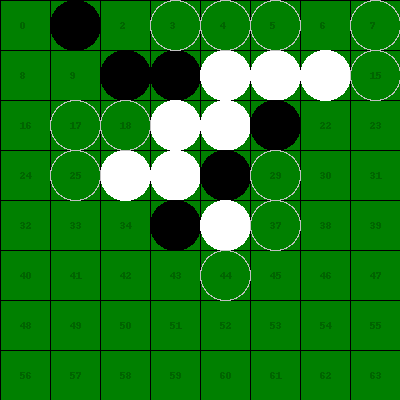

Jogadas válidas: [3, 4, 5, 7, 15, 17, 18, 25, 29, 37, 44]
7


O bobinho jogou na posição 15





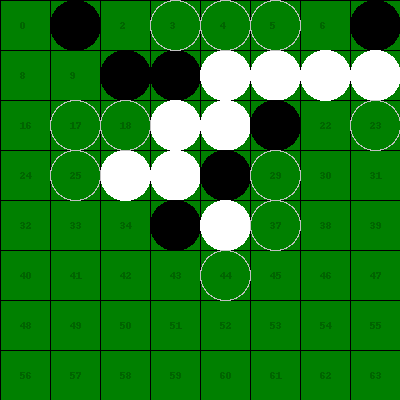

Jogadas válidas: [3, 4, 5, 17, 18, 23, 25, 29, 37, 44]
3


O bobinho jogou na posição 43





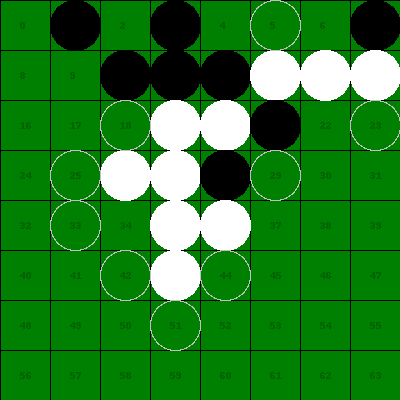

Jogadas válidas: [5, 18, 23, 25, 29, 33, 42, 44, 51]
42


O bobinho jogou na posição 9





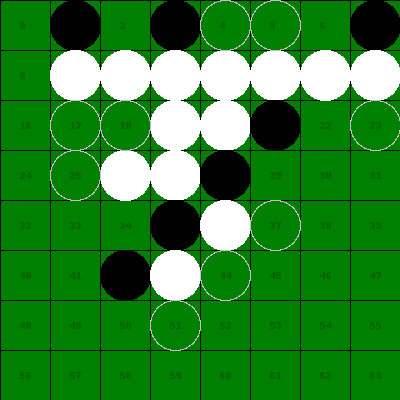

Jogadas válidas: [4, 5, 17, 18, 23, 25, 37, 44, 51]
51


O bobinho jogou na posição 49





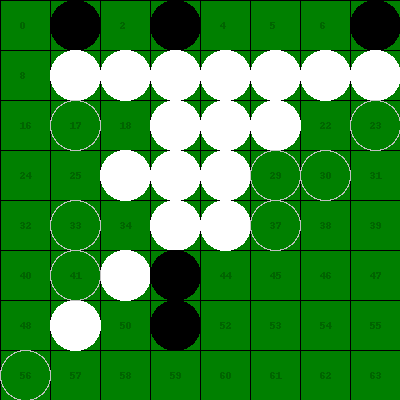

Jogadas válidas: [17, 23, 29, 30, 33, 37, 41, 56]
56


O bobinho jogou na posição 44





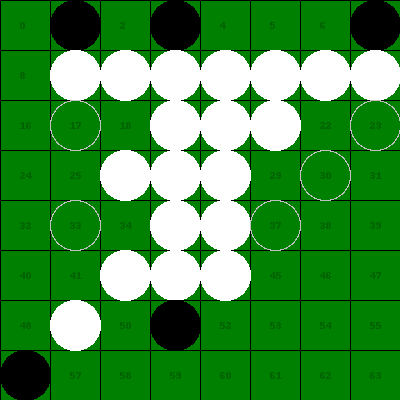

Jogadas válidas: [17, 23, 30, 33, 37]


KeyboardInterrupt: ignored

In [3]:
result, history = game(human_player, player)

if result == 1 :
  print("#========================================#\n")
  print("|      CONGRATULATIONS, YOU WIN          |\n")
  print("#========================================#\n")

else :
  print("#========================================#\n")
  print("|        GAME OVER... TRAIN MORE         |\n")
  print("#========================================#\n")

# **Jogo contra bot um pouco mais inteligente**

In [ ]:
## Função campeonato_with_knowledge ------------------------------------------------------------->>

def campeonato_with_knowledge(player1, player2, num_games = 10000, knowledge = {}) :
    results = [0,0,0]

    for i in range(num_games) :
        result, history = game(player1, player2)
        results[result] += 1

        ## Adicionando as jogadas no histórico
        for tab in history :
            if not tab in knowledge :
                knowledge[tab] = [0, 0, 0]
            knowledge[tab][result] += 1

    return tuple(results), knowledge


## Gerando jogos e guardando em knowledge
results, knowledge = campeonato_with_knowledge(player, player)



## Criando bot com knowledge ------------------------------------------------------------->>

def create_player(knowledge) :
    def player(tab, turn, valid_moves) :
        ## Computando scores de cada move
        scores = []
        for move in valid_moves :
            ## Colocando a peça no tabuleiro
            ltab = list(tab)
            ltab[move] = turn

            ## Computando score
            a,b,c = knowledge.get( tuple(ltab), (1,0,0) )
            scores.append(  turn*(b-c)/(a+b+c) )

        
        chosen = valid_moves[ scores.index( max(scores) )  ] 
        return (turn, chosen )
    return player

player2 = create_player(knowledge)

In [ ]:
result, history = game(human_player, player2)

if result == 1 :
  print("#========================================#\n")
  print("|      CONGRATULATIONS, YOU WIN          |\n")
  print("#========================================#\n")

else :
  print("#========================================#\n")
  print("|        GAME OVER... TRAIN MORE         |\n")
  print("#========================================#\n")
